# Demo for the DoWhy causal API
We show a simple example of adding a causal extension to any dataframe. 

In [2]:
import os, sys
sys.path.append(os.path.abspath("../../"))

In [3]:
import dowhy.datasets
import dowhy.api

import numpy as np
import pandas as pd

from statsmodels.api import OLS

In [4]:
data = dowhy.datasets.linear_dataset(beta=5,
        num_common_causes=1,
        num_instruments = 0,
        num_samples=1000,
        treatment_is_binary=True)
df = data['df']
df['y'] = df['y'] + np.random.normal(size=len(df)) # Adding noise to data. Without noise, the variance in Y|X, Z is zero, and mcmc fails.
data['dot_graph'] = 'digraph { v ->y;X0-> v;X0-> y;}'

In [5]:
# data['df'] is just a regular pandas.DataFrame
df.causal.do(x='v',
                     variable_types={'v': 'b', 'y': 'c', 'X0': 'c'},
                     outcome='y',
                     common_causes=['X0']).groupby('v').mean().plot(y='y', kind='bar')

INFO:dowhy.causal_model:Model to find the causal effect of treatment ['v'] on outcome ['y']
/home/amit/python-virtual-envs/env/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['U', 'X0']


WARN: Do you want to continue by ignoring these unobserved confounders? [y/n] y


INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]
INFO:dowhy.do_sampler:Using WeightingSampler for do sampling.
INFO:dowhy.do_sampler:Caution: do samplers assume iid data.


INFO:dowhy.causal_model:Model to find the causal effect of treatment ['v'] on outcome ['y']
INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['U', 'X0']
INFO:dowhy.causal_identifier:Continuing by ignoring these unobserved confounders because proceed_when_unidentifiable flag is True.
INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]
INFO:dowhy.do_sampler:Using WeightingSampler for do sampling.
INFO:dowhy.do_sampler:Caution: do samplers assume iid data.


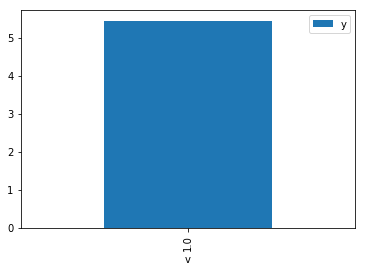

In [6]:
df.causal.do(x={'v': 1}, 
              variable_types={'v': 'b', 'y': 'c', 'X0': 'c'}, 
              outcome='y',
              method='weighting', 
              common_causes=['X0'],
              proceed_when_unidentifiable=True).groupby('v').mean().plot(y='y', kind='bar')

In [7]:
cdf_1 = df.causal.do(x={'v': 1}, 
              variable_types={'v': 'b', 'y': 'c', 'X0': 'c'}, 
              outcome='y', 
              dot_graph=data['dot_graph'],
              proceed_when_unidentifiable=True)

cdf_0 = df.causal.do(x={'v': 0}, 
              variable_types={'v': 'b', 'y': 'c', 'X0': 'c'}, 
              outcome='y', 
              dot_graph=data['dot_graph'],
              proceed_when_unidentifiable=True)

INFO:dowhy.causal_model:Model to find the causal effect of treatment ['v'] on outcome ['y']
INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['U', 'X0']
INFO:dowhy.causal_identifier:Continuing by ignoring these unobserved confounders because proceed_when_unidentifiable flag is True.
INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]
INFO:dowhy.do_sampler:Using WeightingSampler for do sampling.
INFO:dowhy.do_sampler:Caution: do samplers assume iid data.
INFO:dowhy.causal_model:Model to find the causal effect of treatment ['v'] on outcome ['y']
INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['U', 'X0']
INFO:dowhy.causal_identifier:Continuing by ignoring these unobserved confounders because proceed_when_unidentifiable flag is True.
INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]
INFO:dowhy.do_sampler:Using WeightingSampler for do sampling.
INFO:dowhy.do_sampler:Caution: do samplers assum

In [8]:
cdf_0

X0    v         y  propensity_score    weight
0    0.403928  0.0  2.432356          0.589028  1.697711
1    0.279008  0.0 -1.216479          0.607379  1.646418
2   -1.063192  0.0 -1.102948          0.778464  1.284582
3   -0.460479  0.0 -1.001995          0.708544  1.411345
4   -0.384204  0.0  1.008581          0.698823  1.430977
5    0.486305  0.0 -1.399648          0.576787  1.733743
6    0.952612  0.0  0.666174          0.506141  1.975735
7    1.734657  0.0  1.136252          0.388537  2.573756
8    0.162469  0.0 -0.436301          0.624230  1.601972
9    0.454948  0.0  1.149705          0.581459  1.719813
10   2.418322  0.0  4.043232          0.294972  3.390156
11  -0.225459  0.0 -0.895094          0.678016  1.474892
12  -0.232126  0.0 -0.967473          0.678905  1.472961
13   1.168640  0.0  3.631667          0.473155  2.113473
14   1.159903  0.0  0.663069          0.474486  2.107542
15  -2.573709  0.0 -3.825602          0.898443  1.113036
16  -1.947548  0.0 -3.231881          0.857820  1.165745
17   2.066918  0.0  2.767655          0.341513  2.928150
18  -0.099689  0.0 -2.493016          0.661008  1.512841
19   0.067214  0.0  0.407400          0.637786  1.567923
20   0.355654  0.0 -0.622093          0.596152  1.677424
21   0.058065  0.0  0.518388          0.639077  1.564756
22   2.110771  0.0  1.983026          0.335510  2.980534
23   0.550294  0.0  1.993742          0.567212  1.763010
24   1.114494  0.0  0.646450          0.481412  2.077224
25  -1.904864  0.0 -2.301250          0.854608  1.170127
26   1.426611  0.0  0.676993          0.434093  2.303653
27   0.430236  0.0  0.762308          0.585130  1.709022
28  -0.364460  0.0 -0.605725          0.696277  1.436210
29  -0.016650  0.0 -0.803179          0.649543  1.539544
..        ...  ...       ...               ...       ...
970  1.858503  0.0  3.169293          0.370711  2.697516
971  0.512087  0.0 -0.373805          0.572935  1.745398
972  0.535486  0.0  1.478740          0.569432  1.756136
973 -1.594649  0.0 -1.892352          0.829430  1.205648
974  0.451503  0.0  0.266634          0.581971  1.718299
975  0.787764  0.0  2.118886          0.531291  1.882207
976  0.965489  0.0  0.184147          0.504173  1.983445
977 -1.571637  0.0 -1.838201          0.827431  1.208561
978  1.445333  0.0  1.422265          0.431284  2.318657
979 -1.001572  0.0 -0.522836          0.771900  1.295505
980 -0.346370  0.0  0.304536          0.693934  1.441060
981  2.244912  0.0  2.894537          0.317483  3.149770
982  0.910378  0.0 -0.891502          0.512592  1.950868
983  0.421260  0.0  0.879862          0.586462  1.705142
984  0.898803  0.0  1.197624          0.514360  1.944164
985  0.486305  0.0 -1.399648          0.576787  1.733743
986  1.381629  0.0  0.833731          0.440860  2.268296
987  0.964047  0.0  1.859069          0.504393  1.982579
988  0.044596  0.0  0.087691          0.640974  1.560126
989  0.511136  0.0  1.715394          0.573078  1.744964
990  1.488634  0.0 -0.646628          0.424804  2.354025
991 -0.744944  0.0 -2.830292          0.743112  1.345693
992  2.189711  0.0  1.736144          0.324840  3.078443
993 -0.686813  0.0 -1.729886          0.736270  1.358197
994  0.120585  0.0  0.793797          0.630216  1.586756
995 -0.287980  0.0 -0.591574          0.686301  1.457086
996  1.073967  0.0  3.002727          0.487599  2.050866
997  0.937557  0.0  1.944627          0.508441  1.966797
998 -0.459117  0.0 -1.872491          0.708372  1.411687
999  0.964047  0.0  1.859069          0.504393  1.982579

[1000 rows x 5 columns]

In [9]:
cdf_1

X0    v         y  propensity_score    weight
0    0.290789  1.0  3.979893          0.394340  2.535886
1    0.512625  1.0  4.475797          0.427145  2.341125
2    1.062969  1.0  6.673199          0.510721  1.958015
3   -0.624970  1.0  4.060173          0.271135  3.688195
4   -0.148206  1.0  4.703679          0.332379  3.008615
5    1.719316  1.0  5.756267          0.609233  1.641409
6   -0.619271  1.0  5.680458          0.271824  3.678846
7    0.977741  1.0  4.057646          0.497699  2.009247
8   -0.307030  1.0  4.414821          0.311197  3.213395
9    0.277186  1.0  5.519333          0.392355  2.548710
10  -0.857098  1.0  4.012558          0.244021  4.098008
11   1.770647  1.0  7.226577          0.616676  1.621597
12   1.291454  1.0  5.838120          0.545512  1.833139
13   1.144755  1.0  7.049113          0.523204  1.911299
14   1.138345  1.0  6.424092          0.522227  1.914877
15   1.052117  1.0  6.936858          0.509064  1.964391
16   0.637922  1.0  5.555444          0.445981  2.242246
17   0.649826  1.0  6.410330          0.447780  2.233239
18   2.460420  1.0  8.792864          0.710351  1.407754
19   0.243835  1.0  5.075650          0.387506  2.580606
20   0.807812  1.0  4.731404          0.471762  2.119715
21   1.298341  1.0  7.758199          0.546556  1.829639
22   0.240623  1.0  6.008571          0.387040  2.583712
23   1.058440  1.0  6.897561          0.510030  1.960671
24   0.069249  1.0  7.055973          0.362501  2.758612
25   1.407864  1.0  4.980558          0.563090  1.775916
26  -0.692247  1.0  4.488188          0.263085  3.801047
27   0.400927  1.0  5.207265          0.410528  2.435890
28  -1.033904  1.0  2.990824          0.224639  4.451583
29  -0.776183  1.0  5.405714          0.253260  3.948510
..        ...  ...       ...               ...       ...
970  1.304562  1.0  6.541645          0.547498  1.826490
971 -0.262312  1.0  5.762821          0.317087  3.153713
972  1.147639  1.0  5.315407          0.523644  1.909694
973  0.184374  1.0  4.284324          0.378915  2.639111
974 -0.714900  1.0  4.892138          0.260410  3.840102
975  1.098240  1.0  4.752127          0.516107  1.937582
976  0.400927  1.0  5.207265          0.410528  2.435890
977 -0.061028  1.0  3.880924          0.344307  2.904381
978  1.612085  1.0  7.568635          0.593521  1.684859
979  1.329355  1.0  6.351310          0.551250  1.814060
980  0.648052  1.0  4.170338          0.447512  2.234577
981  1.148671  1.0  5.878938          0.523801  1.909120
982 -0.749465  1.0  3.798001          0.256361  3.900747
983 -0.776183  1.0  5.405714          0.253260  3.948510
984  0.323076  1.0  5.351432          0.399063  2.505872
985 -0.743046  1.0  3.011968          0.257110  3.889387
986 -0.375397  1.0  5.369006          0.302311  3.307852
987 -0.379267  1.0  4.455194          0.301812  3.313317
988  1.768568  1.0  6.877053          0.616376  1.622387
989  1.076537  1.0  5.635090          0.512794  1.950102
990  1.836512  1.0  8.447551          0.626147  1.597068
991  1.546945  1.0  7.857669          0.583881  1.712678
992  1.138345  1.0  6.424092          0.522227  1.914877
993  0.959500  1.0  5.087669          0.494912  2.020562
994 -0.727181  1.0  3.334014          0.258967  3.861503
995 -0.692247  1.0  4.488188          0.263085  3.801047
996  1.336478  1.0  7.996413          0.552327  1.810523
997  0.722018  1.0  6.028093          0.458715  2.180002
998  0.231477  1.0  5.734336          0.385715  2.592590
999 -0.329909  1.0  4.198863          0.308208  3.244566

[1000 rows x 5 columns]

## Comparing the estimate to Linear Regression
First, estimating the effect using the causal data frame, and the 95% confidence interval.

In [10]:
(cdf_1['y'] - cdf_0['y']).mean()

In [11]:
1.96*(cdf_1['y'] - cdf_0['y']).std() / np.sqrt(len(df))

Comparing to the estimate from OLS.

In [12]:
model = OLS(df['y'], df[['X0', 'v']])
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.939
Model:                            OLS   Adj. R-squared (uncentered):              0.938
Method:                 Least Squares   F-statistic:                              7629.
Date:                Sun, 13 Oct 2019   Prob (F-statistic):                        0.00
Time:                        18:13:18   Log-Likelihood:                         -1401.9
No. Observations:                1000   AIC:                                      2808.
Df Residuals:                     998   BIC:                                      2818.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X0             1.1797      0.032     37.032      0.000       1.117       1.242
v              4.9677      0.053     93.266      0.000       4.863       5.072
==============================================================================
Omnibus:                        4.477   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.107   Jarque-Bera (JB):                3.874
Skew:                          -0.076   Prob(JB):                        0.144
Kurtosis:                       2.736   Cond. No.                         1.97
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""